<a href="https://colab.research.google.com/github/vasu31d/Swiggy_delivery_time_prediction/blob/main/Swiggy_delivery_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/content/swiggy_cleaned.csv')

In [ ]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


In [ ]:
df.shape

(45502, 26)

In [ ]:
df.describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
count,43648.000000,43594.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,44509.000000,45502.000000,45502.000000,45502.000000,45502.000000,43862.000000,43862.000000,41872.000000
mean,29.555008,4.635287,18.913696,76.921664,18.977356,76.985325,1.019406,0.744928,26.297591,13.811657,2.980726,0.274867,9.989399,17.423966,9.719296
std,5.761482,0.313827,5.467265,3.503107,5.469056,3.503260,0.835229,0.572488,9.386419,8.709540,0.546031,0.446452,4.087516,4.817856,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,5.000000,0.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,0.000000,0.000000,19.000000,6.000000,3.000000,0.000000,5.000000,15.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,1.000000,1.000000,26.000000,13.000000,3.000000,0.000000,10.000000,19.000000,9.193014
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,2.000000,1.000000,32.000000,20.000000,3.000000,1.000000,15.000000,21.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,31.000000,4.000000,1.000000,15.000000,23.000000,20.969489


# **EDA simple**


<Axes: ylabel='Frequency'>

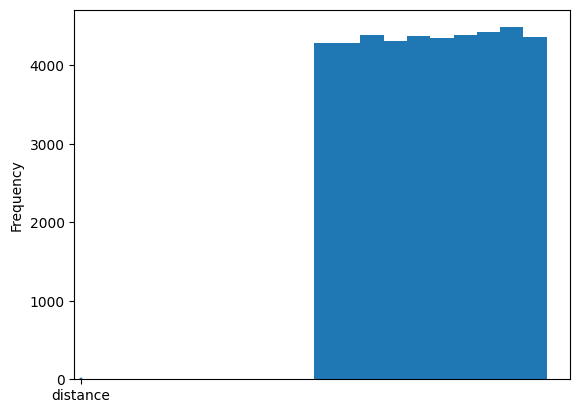

In [ ]:
df['age'].plot(kind = 'hist')
df['distance'].plot(kind = 'box')

<Axes: >

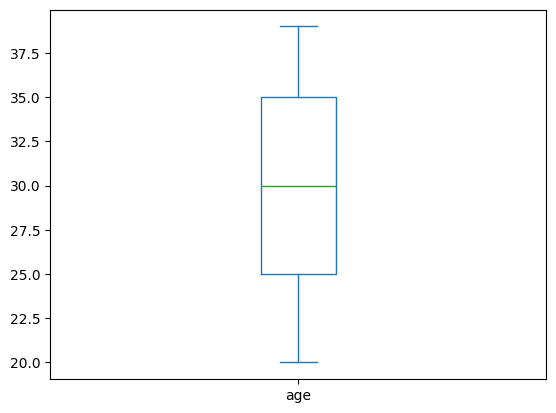

In [ ]:
df['age'].plot(kind='box')

In [ ]:
df.columns


Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [ ]:
columns_to_drop = ['rider_id','age','restaurant_latitude','city_name','restaurant_longitude', 'delivery_latitude', 'delivery_longitude','order_date','type_of_order', 'order_day_of_week','order_time_hour', 'order_time_of_day']

In [ ]:
df.drop(columns=columns_to_drop,inplace = True)

In [ ]:
df

,ratings,weather,traffic,vehicle_condition,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,distance
0,4.9,sunny,high,2,motorcycle,0.0,no,urban,24,19,3,1,15.0,3.025149
1,4.5,stormy,jam,2,scooter,1.0,no,metropolitian,33,25,3,0,5.0,20.183530
2,4.4,sandstorms,low,0,motorcycle,1.0,no,urban,26,19,3,1,15.0,1.552758
3,4.7,sunny,medium,0,motorcycle,1.0,no,metropolitian,21,5,4,0,10.0,7.790401
4,4.6,cloudy,high,1,scooter,1.0,no,metropolitian,30,26,3,1,15.0,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,4.8,windy,high,1,motorcycle,0.0,no,metropolitian,32,24,3,0,10.0,1.489846
45498,4.6,windy,jam,0,motorcycle,1.0,no,metropolitian,36,16,2,0,15.0,NaN
45499,4.9,cloudy,low,1,scooter,0.0,no,metropolitian,16,11,3,0,15.0,4.657195
45500,4.7,cloudy,high,0,motorcycle,1.0,no,metropolitian,26,7,3,0,5.0,6.232393


## **missing values**

In [ ]:
df.isna().sum()

,0
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198
time_taken,0
order_day,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0
time_taken,0
order_day,0


### **Encoding**


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

df.drop(columns=['order_month'],inplace=True)

In [ ]:
df.drop(columns=['order_month'],inplace=True)

In [ ]:
df.columns

Index(['ratings', 'weather', 'traffic', 'vehicle_condition', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken',
       'order_day', 'is_weekend', 'pickup_time_minutes', 'distance'],
      dtype='object')

In [ ]:
nominal_cols = ['type_of_vehicle','festival','city_type','order_day','is_weekend']
ordinal_cols = ['weather','traffic']
numeric_cols = ['ratings','vehicle_condition','multiple_deliveries','pickup_time_minutes','distance']

In [ ]:
df['weather'].unique()

array(['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy', nan],
      dtype=object)

In [ ]:
# Corrected the typo 'windyfog' and ensuring order of weather categories.
# The order for traffic is also defined here.
weather_order = ['sunny','cloudy','windy','fog','sandstorms','stormy']
traffic_order = ['low','medium','high','jam']
seq_order = [weather_order, traffic_order]

In [ ]:
df

,ratings,weather,traffic,vehicle_condition,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,order_day,is_weekend,pickup_time_minutes,distance
0,4.9,sunny,high,2,motorcycle,0.0,no,urban,24,19,1,15.0,3.025149
1,4.5,stormy,jam,2,scooter,1.0,no,metropolitian,33,25,0,5.0,20.183530
2,4.4,sandstorms,low,0,motorcycle,1.0,no,urban,26,19,1,15.0,1.552758
3,4.7,sunny,medium,0,motorcycle,1.0,no,metropolitian,21,5,0,10.0,7.790401
4,4.6,cloudy,high,1,scooter,1.0,no,metropolitian,30,26,1,15.0,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,4.8,windy,high,1,motorcycle,0.0,no,metropolitian,32,24,0,10.0,1.489846
45498,4.6,windy,jam,0,motorcycle,1.0,no,metropolitian,36,16,0,15.0,NaN
45499,4.9,cloudy,low,1,scooter,0.0,no,metropolitian,16,11,0,15.0,4.657195
45500,4.7,cloudy,high,0,motorcycle,1.0,no,metropolitian,26,7,0,5.0,6.232393


In [ ]:
from sklearn.impute import SimpleImputer

# Define imputers for numerical and categorical columns
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

Transformer = ColumnTransformer([
    ('Nominal Encoding', OneHotEncoder(handle_unknown='ignore'), nominal_cols),
    ("Ordinal Encoding", OrdinalEncoder(categories=seq_order, handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols),
    ("Feature Scaling", StandardScaler(), numeric_cols)
])

In [ ]:
Transformer

ColumnTransformer(transformers=[('Nominal Encoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['type_of_vehicle', 'festival', 'city_type',
                                  'order_day', 'is_weekend']),
                                ('Ordinal Encoding',
                                 OrdinalEncoder(categories=[['sunny', 'cloudy',
                                                             'windy', 'fog',
                                                             'sandstorms',
                                                             'stormy'],
                                                            ['low', 'medium',
                                                             'high', 'jam']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['weather', 'traffic']),
                                ('Feature Scaling', StandardScaler(),
                                 ['ratings', 'vehicle_condition',
                                  'multiple_deliveries', 'pickup_time_minutes',
                                  'distance'])])

In [ ]:
Pipeline([("data preprocessing",Transformer),("Ml alogorithm",LinearRegression())])

Pipeline(steps=[('data preprocessing',
                 ColumnTransformer(transformers=[('Nominal Encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'order_day', 'is_weekend']),
                                                 ('Ordinal Encoding',
                                                  OrdinalEncoder(categories=[['sunny',
                                                                              'cloudy',
                                                                              'windy',
                                                                              'fog',
                                                                              'sandstorms',
                                                                              'stormy'],
                                                                             ['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['weather', 'traffic']),
                                                 ('Feature Scaling',
                                                  StandardScaler(),
                                                  ['ratings',
                                                   'vehicle_condition',
                                                   'multiple_deliveries',
                                                   'pickup_time_minutes',
                                                   'distance'])])),
                ('Ml alogorithm', LinearRegression())])

In [ ]:
x=df.drop('time_taken',axis=1)
y=df['time_taken']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_test

,ratings,weather,traffic,vehicle_condition,type_of_vehicle,multiple_deliveries,festival,city_type,order_day,is_weekend,pickup_time_minutes,distance
40290,4.8,sunny,jam,1,scooter,1.0,no,metropolitian,2,0,10.0,12.417488
25035,5.0,fog,jam,2,scooter,1.0,no,metropolitian,16,0,15.0,NaN
2582,4.5,windy,low,2,scooter,0.0,no,metropolitian,13,1,5.0,4.406344
27641,4.5,sandstorms,medium,2,motorcycle,1.0,no,metropolitian,3,0,15.0,4.537513
44967,4.5,fog,medium,1,scooter,1.0,no,urban,3,0,10.0,6.120942
...,...,...,...,...,...,...,...,...,...,...,...,...
32605,5.0,stormy,low,2,motorcycle,0.0,no,metropolitian,13,1,5.0,8.952839
12322,5.0,windy,low,0,motorcycle,1.0,no,metropolitian,16,0,10.0,11.720182
15363,NaN,windy,low,2,motorcycle,1.0,no,metropolitian,16,0,NaN,20.182686
5860,4.2,sandstorms,jam,1,scooter,1.0,no,metropolitian,8,0,10.0,12.074378


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Define imputers for numerical and categorical columns
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Update the ColumnTransformer to include imputation within the pipeline
Transformer = ColumnTransformer([
    ('Nominal Encoding', Pipeline([('imputer', categorical_imputer), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), nominal_cols),
    ("Ordinal Encoding", Pipeline([('imputer', categorical_imputer), ('ordinal', OrdinalEncoder(categories=seq_order, handle_unknown='use_encoded_value', unknown_value=-1))]), ordinal_cols),
    ("Feature Scaling", Pipeline([('imputer', numeric_imputer), ('scaler', StandardScaler())]), numeric_cols)
])

model=Pipeline([("data preprocessing",Transformer),("Ml alogorithm",LinearRegression())])
model

Pipeline(steps=[('data preprocessing',
                 ColumnTransformer(transformers=[('Nominal Encoding',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'order_day', 'is_weekend']),
                                                 ('Ordinal Encoding',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='mos...
                                                                                               'sandstorms',
                                                                                               'stormy'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['weather', 'traffic']),
                                                 ('Feature Scaling',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ratings',
                                                   'vehicle_condition',
                                                   'multiple_deliveries',
                                                   'pickup_time_minutes',
                                                   'distance'])])),
                ('Ml alogorithm', LinearRegression())])

In [ ]:
# Fit the model using the pipeline which now includes imputation
model.fit(x_train, y_train)

Pipeline(steps=[('data preprocessing',
                 ColumnTransformer(transformers=[('Nominal Encoding',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'order_day', 'is_weekend']),
                                                 ('Ordinal Encoding',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='mos...
                                                                                               'sandstorms',
                                                                                               'stormy'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['weather', 'traffic']),
                                                 ('Feature Scaling',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ratings',
                                                   'vehicle_condition',
                                                   'multiple_deliveries',
                                                   'pickup_time_minutes',
                                                   'distance'])])),
                ('Ml alogorithm', LinearRegression())])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([30.79153584, 28.39475655, 17.56832098, ..., 24.81744317,
       36.93469241, 19.91416073])

# **Model evaluation**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [ ]:
model_lr=Pipeline([("data preprocessing",Transformer),("Ml alogorithm",LinearRegression())])
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
print("Linear Regression")
print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

Linear Regression
R2 score: 0.4952078566142669
MAE: 5.325590086954631
MSE: 44.402031632943306


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=Pipeline([("data preprocessing",Transformer),("Ml alogorithm",DecisionTreeRegressor())])
model_dt.fit(x_train,y_train)
y_pred = model_dt.predict(x_test)
print("Decision Tree Regression")
print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

Decision Tree Regression
R2 score: 0.4484545074026497
MAE: 5.287111306449841
MSE: 48.514503900670256


In [ ]:
from sklearn.svm import SVR
model_svm=Pipeline([("data preprocessing",Transformer),("Ml alogorithm",SVR())])
model_svm.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Support Vector Regression")
print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

Support Vector Regression
R2 score: 0.4952078566142669
MAE: 5.325590086954631
MSE: 44.402031632943306


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf=Pipeline([("data preprocessing",Transformer),("Ml alogorithm",RandomForestRegressor())])
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
print("Random Forest Regression")
print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

Random Forest Regression
R2 score: 0.6995779404246321
MAE: 4.0017527404105255
MSE: 26.42543067930893


In [ ]:
import pickle

In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(model,file)